#### Hashing Boolean network trajectories
Winter 2025

Alan M H Beem

In [1]:
from abn_mir_plotting_functions import select_network
from boolean_networks import _BooleanFunctionRandom, _BooleanFunctionAlternating, _BooleanFunctionSequence
from bn_graph_methods import *
import matplotlib.pyplot as plt
from abn_mir_plotting_functions import select_network  # colorsys might be interesting to explore in plotting functions
from bn_mir_helper_functions_V1 import get_least_common_multiple

N = 7  # 1 ≤ K ≤ 2

Algorithm:

Graph representation: Add all pairs of states (t, t+1) to a dictionary as (key: str, value: str): these are all the edges in a graph of all observed states.


Observation frequency as node color:
Add all states to a dictionary as keys over all run-ins and accumulate observations as an integer sum.

In [2]:
bn = select_network(N, 10, 25, 5, 25, 1000)[0]  # either the greater number of nodes or somethign about selecting such a network -> more longer single chains to cycles
bn.run_ins_from_homogeneous_states()
for _ in range(2000):
    # bn.add_cycle_without_resample()
    bn.add_cycle()
bn.bn_collapsed_cycles.sort_cycle_records_by_num_observations()
print(bn)


BooleanNetwork: N=7. avg_k= 1.5714285714285714. Run-ins: 2204. Observed cycles: 6. t_records: 2204. u_records: 0
Cycle lengths: [12, 7, 4, 4, 4, 1]


### A Boolean network

In [3]:
cumulative_runs = TrajectoryCycleGraph()
for record in (c_records:=bn.bn_collapsed_cycles.cycle_records):
    print()
    see_run = TrajectoryCycleGraph()
    see_run.set_cycle(record.cycle_states_list)
    nodes = []
    for t_record in bn.bn_trajectories.t_records:
        if t_record.end_index == c_records.index(record):
            nodes.extend(see_run.add_all(run_in_as_edges(t_record.run_in), edge_weights(t_record.run_in))) # ... .extend(executes these statements)
    cumulative_runs.edges = cumulative_runs.edges.union(see_run.edges)
    cumulative_runs.reversed_edges = cumulative_runs.reversed_edges.union(see_run.reversed_edges)
    cumulative_runs.cycle_set = cumulative_runs.cycle_set.union(see_run.cycle_set)
    fig,ax = plt.subplots(nrows=1, ncols=1)
    plt.title(f"cycle length: {len(record)}, number of observations: {record.num_observations}")  # TODO keep track of order cycles observed
    fig = see_run.visualize_nx(reversed=False)
    plt.show()
plt.figure()
plt.title('All trajectories')
cumulative_runs.visualize_nx(reversed=False)
plt.show()
print(bn)   
print(f"2^N = 2^{len(bn)} = {2**len(bn)}")

TypeError: 'NoneType' object is not iterable

### A Boolean network with one random node, for initial conditions in cycle states

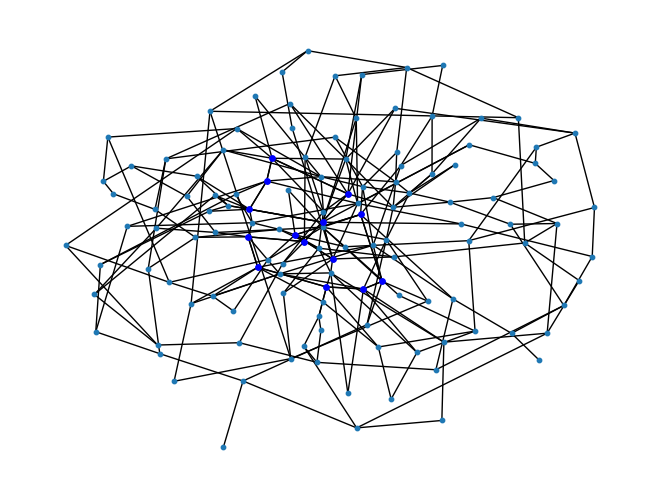

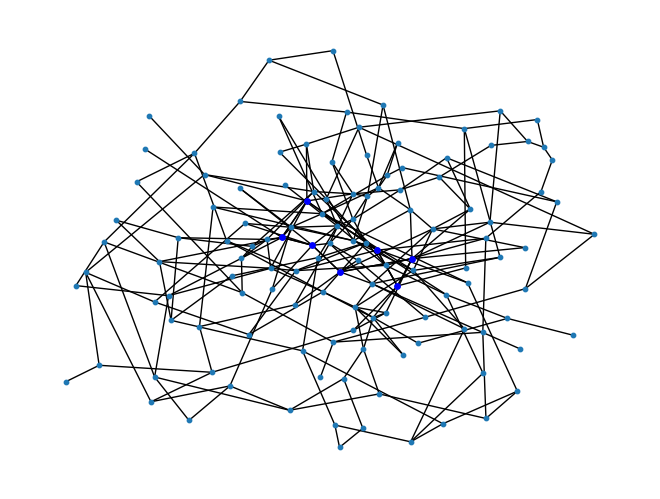

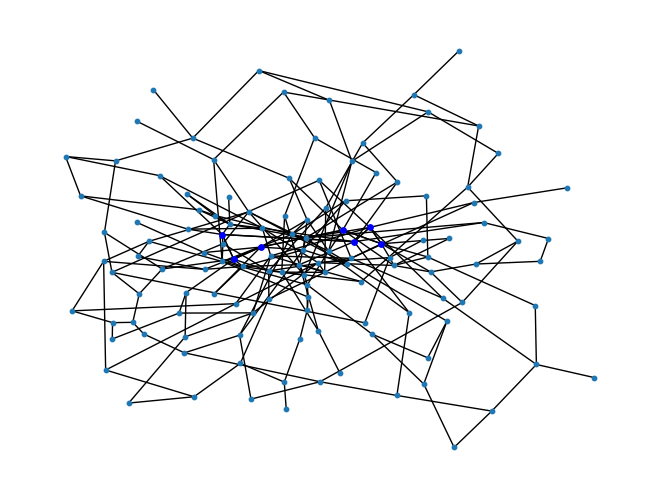

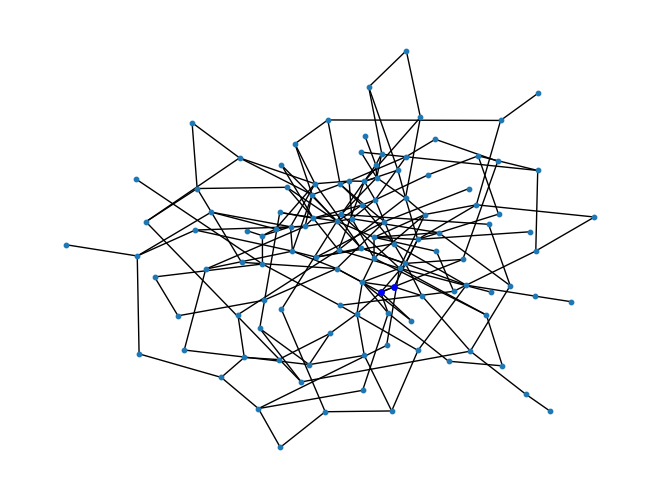

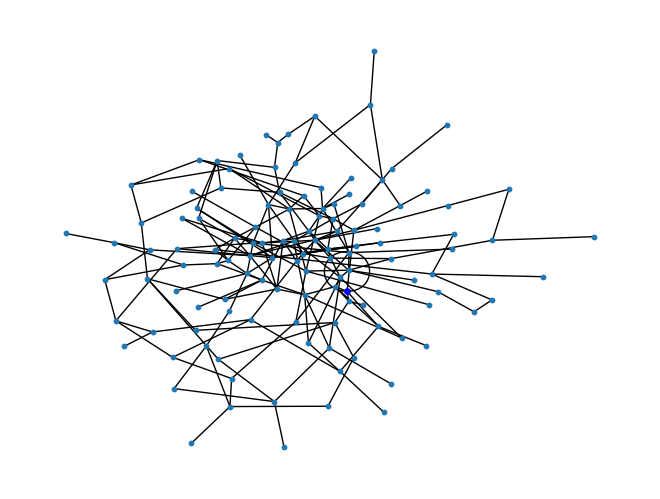

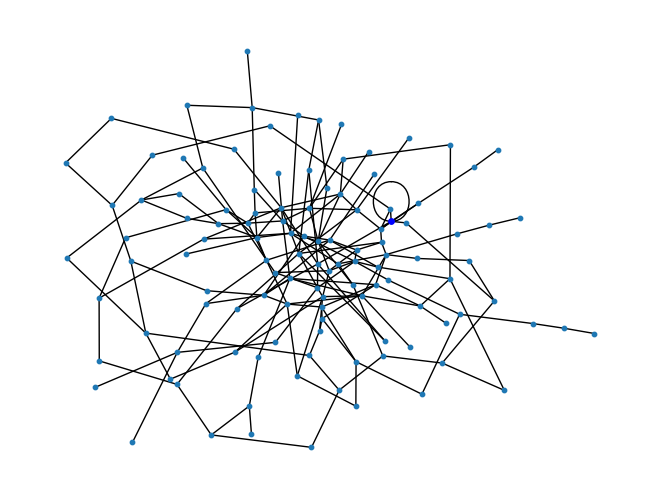

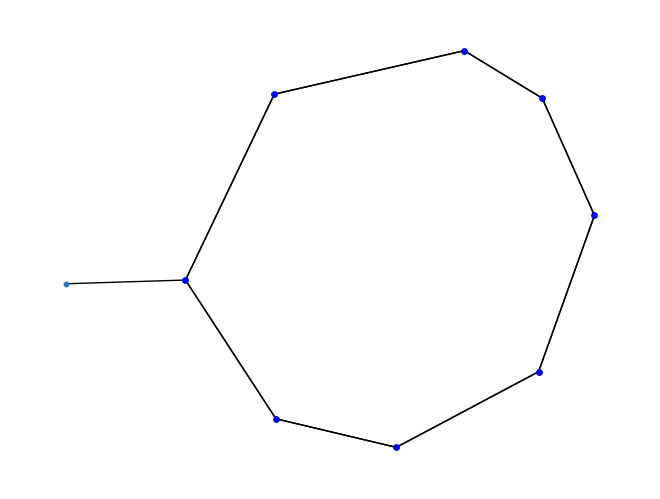

BooleanNetwork: N=7. avg_k= 1.7142857142857142. Run-ins: 4206. Observed cycles: 7. t_records: 4206. u_records: 0
Cycle lengths: [14, 7, 7, 2, 1, 1, 8]
2^N: 128


In [4]:

bn.nodes[0].function = _BooleanFunctionRandom()


bn.run_ins_from_homogeneous_states()
for _ in range(2000):
    bn.add_cycle()
bn.bn_collapsed_cycles.sort_cycle_records_by_num_observations()
cumulative_runs = TrajectoryCycleGraph()
for record in (c_records:=bn.bn_collapsed_cycles.cycle_records):
    see_run = TrajectoryCycleGraph()
    see_run.set_cycle(record.cycle_states_list)
    node_set = set()
    for t_record in bn.bn_trajectories.t_records:
        if t_record.end_index == c_records.index(record):
            see_run.add_all(run_in_as_edges(t_record.run_in), edge_weights(t_record.run_in))
    # cumulative_runs.edges = cumulative_runs.edges.union(see_run.edges)
    # cumulative_runs.reversed_edges = cumulative_runs.reversed_edges.union(see_run.reversed_edges)
    # cumulative_runs.cycle_set = cumulative_runs.cycle_set.union(see_run.cycle_set)
    plt.figure()
    see_run.visualize_nx(reversed=False)
    plt.show()
# plt.figure()
# cumulative_runs.visualize_nx(reversed=False)
# plt.show()
print(bn)   
print(f"2^N: {2**len(bn)}")

### A Boolean network with one alternating node

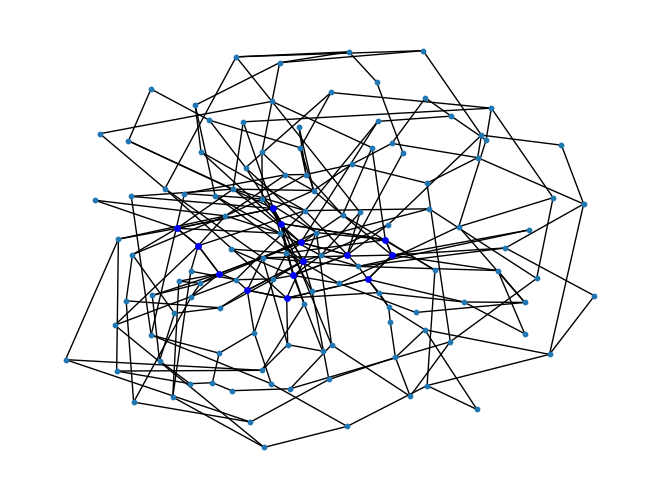

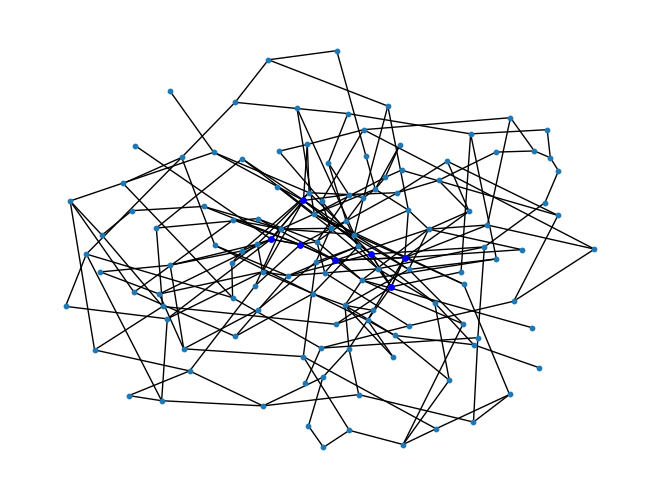

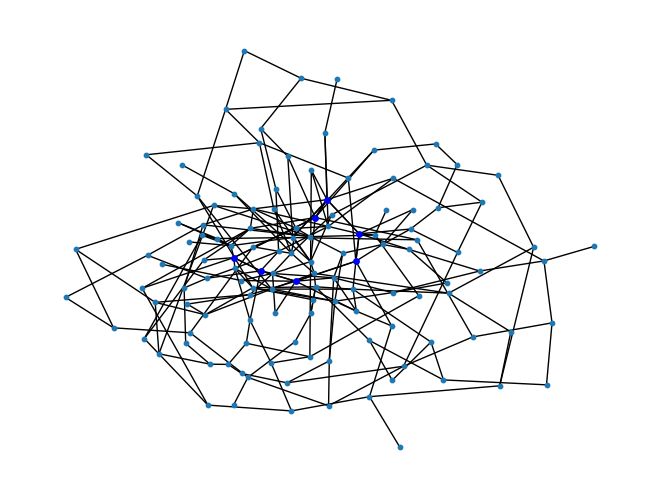

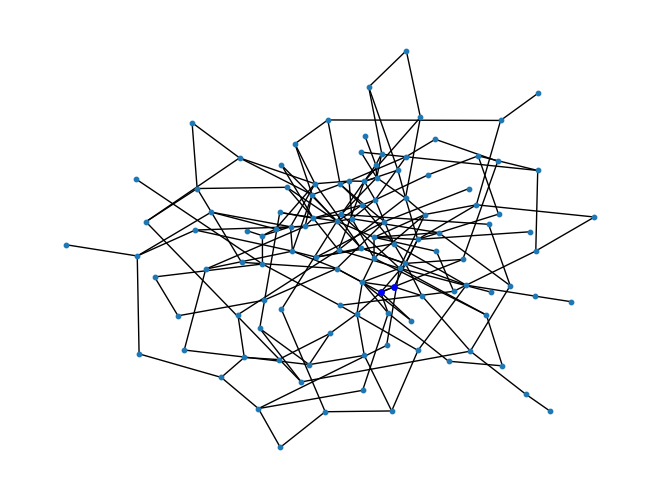

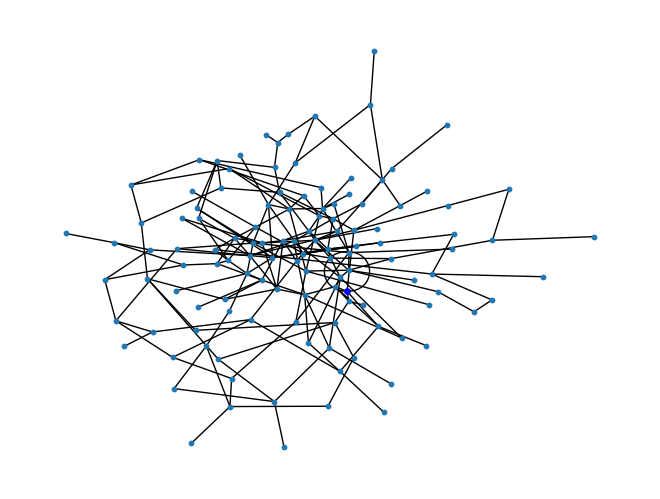

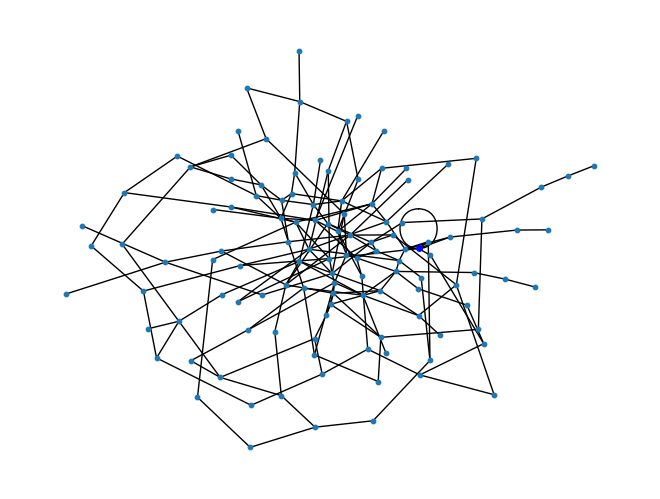

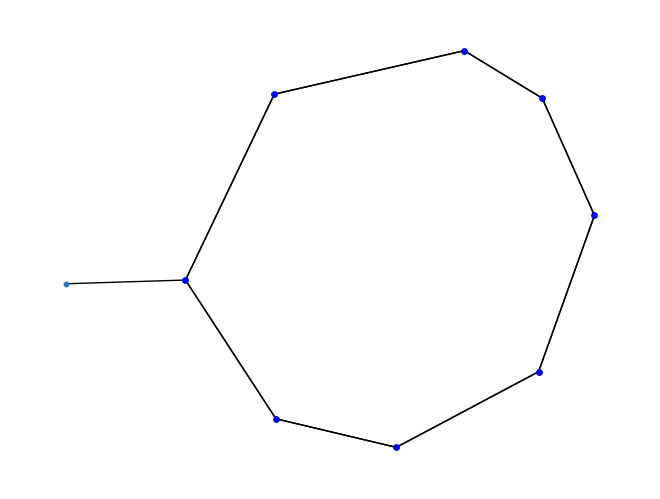

BooleanNetwork: N=7. avg_k= 1.7142857142857142. Run-ins: 6208. Observed cycles: 7. t_records: 6208. u_records: 0
Cycle lengths: [14, 7, 7, 2, 1, 1, 8]
2^N: 128


In [5]:
bn.nodes[0].function = _BooleanFunctionAlternating()

bn.nodes[0].function.half_cycle_length = get_least_common_multiple([len(cycle) for cycle in bn.bn_collapsed_cycles.cycle_records])  # bn.get_avg_cycle_length()  # bn.longest_cycle_length()  # use gcm scaling- 
bn.run_ins_from_homogeneous_states()
for _ in range(2000):
    bn.add_cycle()
bn.bn_collapsed_cycles.sort_cycle_records_by_num_observations()
# cumulative_runs = TrajectoryCycleGraph()
for record in (c_records:=bn.bn_collapsed_cycles.cycle_records):
    see_run = TrajectoryCycleGraph()
    see_run.set_cycle(record.cycle_states_list)
    node_set = set()
    for t_record in bn.bn_trajectories.t_records:
        if t_record.end_index == c_records.index(record):
            see_run.add_all(run_in_as_edges(t_record.run_in), edge_weights(t_record.run_in))
    # cumulative_runs.edges = cumulative_runs.edges.union(see_run.edges)
    # cumulative_runs.reversed_edges = cumulative_runs.reversed_edges.union(see_run.reversed_edges)
    # cumulative_runs.cycle_set = cumulative_runs.cycle_set.union(see_run.cycle_set)
    plt.figure()
    see_run.visualize_nx(reversed=False)
    plt.show()
# plt.figure()
# cumulative_runs.visualize_nx(reversed=False)
# plt.show()
print(bn)   
print(f"2^N: {2**len(bn)}")

### A Boolean network with a node with a circular sequence of states

BooleanNetwork: N=7. avg_k= 1.7142857142857142. Run-ins: 2002. Observed cycles: 8. t_records: 2002. u_records: 0
Cycle lengths: [11, 12, 5, 3, 1, 12, 10, 7]
2^N: 128

cycle length: 11, number of observations: 587


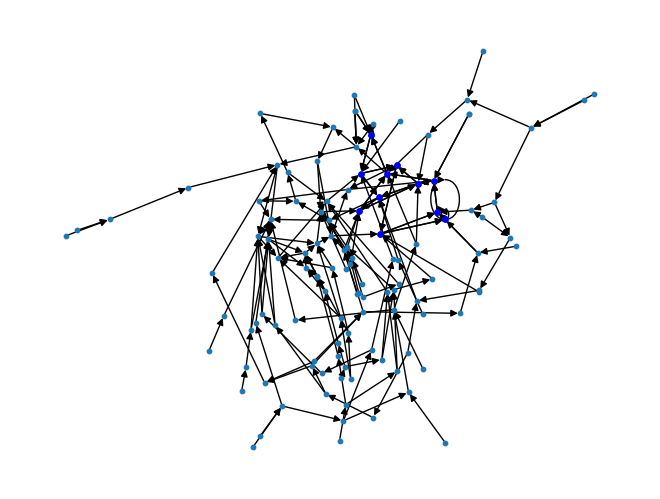


cycle length: 12, number of observations: 476


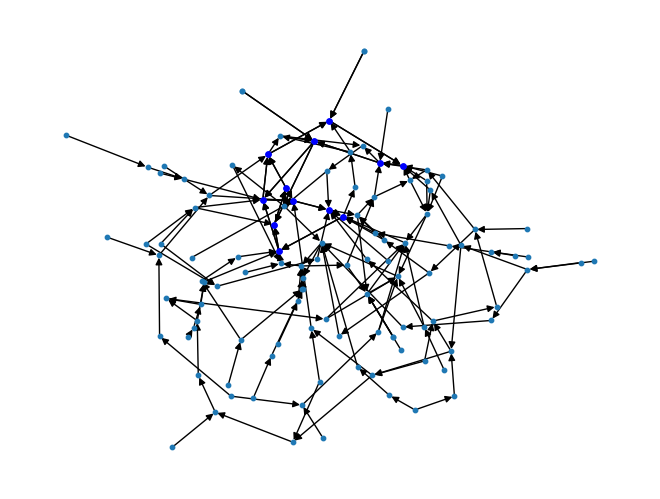


cycle length: 5, number of observations: 430


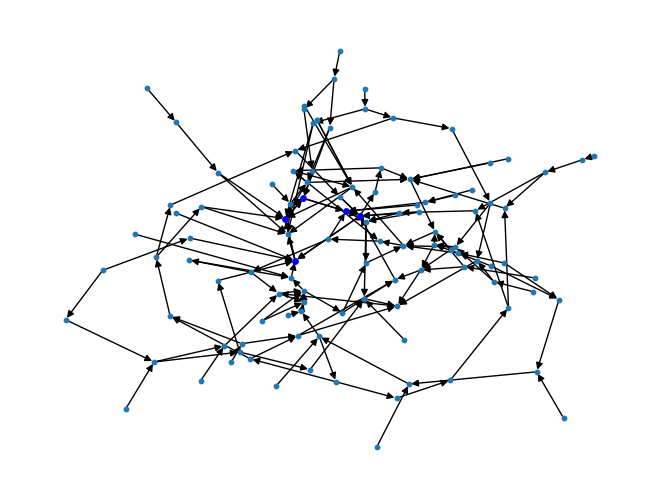


cycle length: 3, number of observations: 238


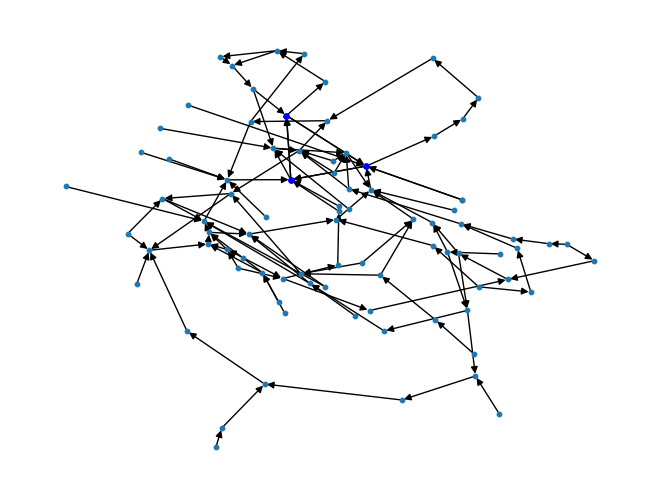


cycle length: 1, number of observations: 153


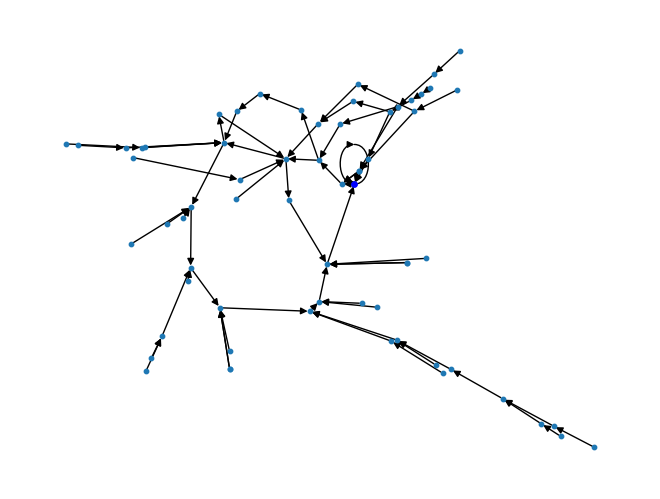


cycle length: 12, number of observations: 103


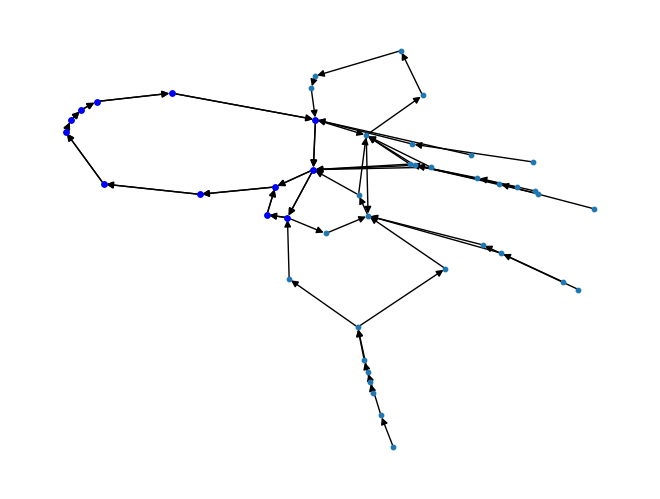


cycle length: 10, number of observations: 10


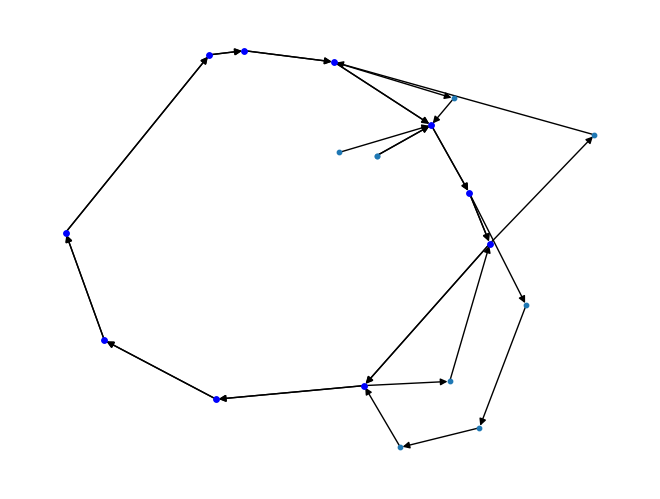


cycle length: 7, number of observations: 5


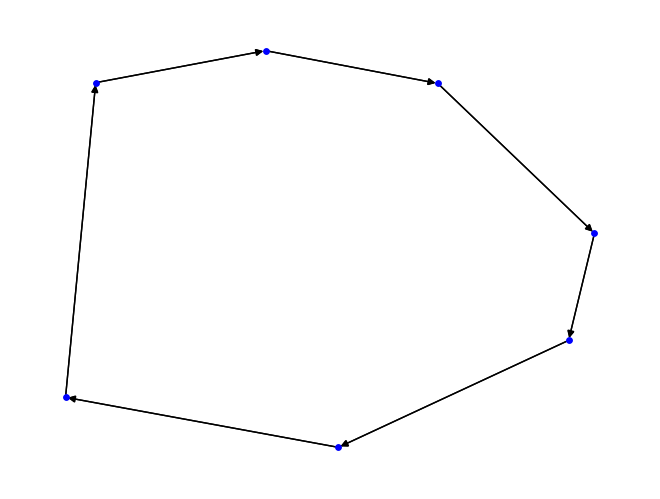

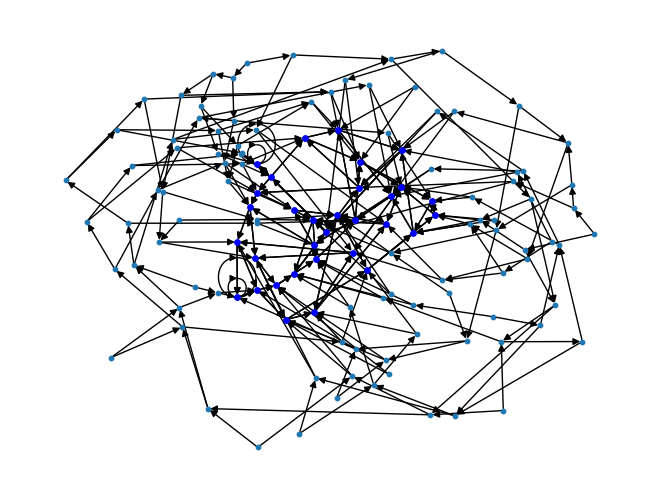

In [6]:
bn.nodes[0].function = _BooleanFunctionSequence(sequence=[True,True,True,False,False,True,False,True,False])
bn.reset_network_data()
bn.run_ins_from_homogeneous_states()
for _ in range(2000):
    # bn.add_cycle_without_resample()
    bn.add_cycle()
bn.bn_collapsed_cycles.sort_cycle_records_by_num_observations()
print(bn)   
print(f"2^N: {2**len(bn)}")
cumulative_runs = TrajectoryCycleGraph()
for record in (c_records:=bn.bn_collapsed_cycles.cycle_records):
    print()
    print(f"cycle length: {len(record)}, number of observations: {record.num_observations}")
    see_run = TrajectoryCycleGraph()
    see_run.set_cycle(record.cycle_states_list)
    for t_record in bn.bn_trajectories.t_records:
        if t_record.end_index == c_records.index(record):
            see_run.add_all(run_in_as_edges(t_record.run_in), edge_weights(t_record.run_in))
    cumulative_runs.edges = cumulative_runs.edges.union(see_run.edges)
    cumulative_runs.reversed_edges = cumulative_runs.reversed_edges.union(see_run.reversed_edges)
    cumulative_runs.cycle_set = cumulative_runs.cycle_set.union(see_run.cycle_set)
    plt.figure()
    see_run.visualize_nx(reversed=False, directed=True)
    plt.show()
plt.figure()
cumulative_runs.visualize_nx(reversed=False, directed=True)
plt.show()

# good test, but, these need the longer recordings and its gonna be a blob- but maybe highlight cycle states

### Longer recording of network with driver node behavior

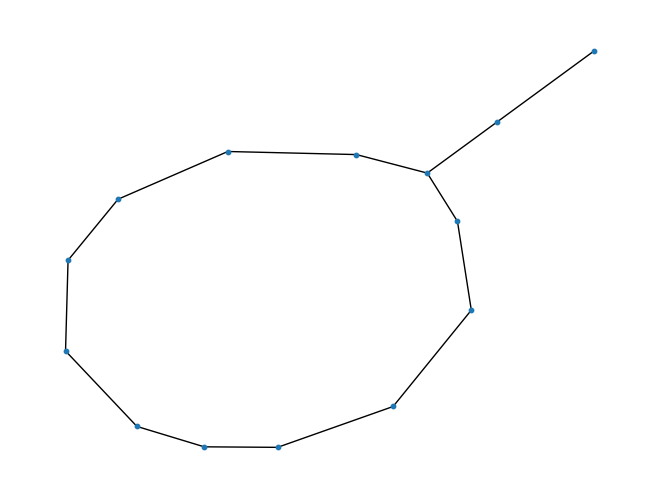

In [4]:
run_ins_steps_nodes = bn.unrecorded_states_with_noise(20000, [False for _ in bn.nodes])
# print(run_ins_steps_nodes)
lr_t = TrajectoryCycleGraph()
lr_t.add_all(run_in_as_edges(run_ins_steps_nodes[0]), edge_weights(run_ins_steps_nodes[0]))
plt.figure()
lr_t.visualize_nx(reversed=False)
plt.show()

In [8]:
print(bn)
for each in bn.nodes:
    print(each.function)
for each in bn.node_inputs_assignments:
    print(each)  # Make a BooleanNetwork from string function

BooleanNetwork: N=7. avg_k= 1.7142857142857142. Run-ins: 2002. Observed cycles: 8. t_records: 2002. u_records: 0
Cycle lengths: [11, 12, 5, 3, 1, 12, 10, 7]
[1, 5]
[5, 1]
[5, 0]
[4, 6]
[3, 0]
[0, 2]
[1, 6]


#### For a larger network, with all possible initial conditions, trajectories to observed cycles as graphs

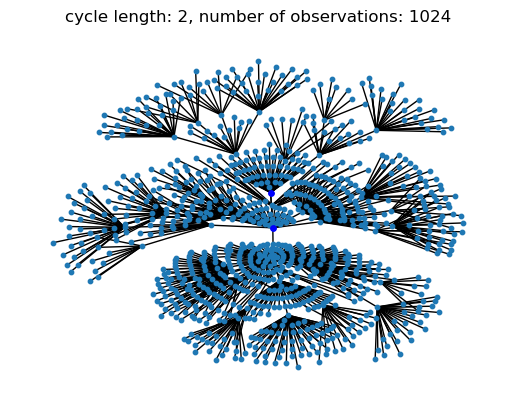

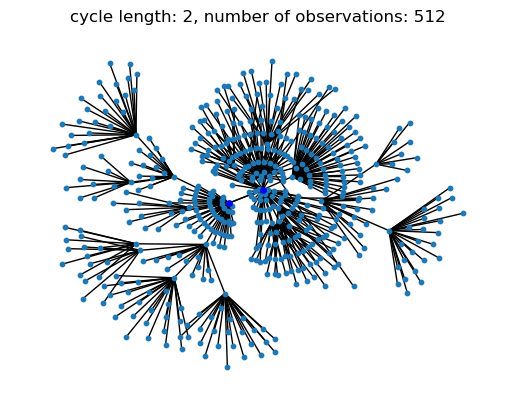

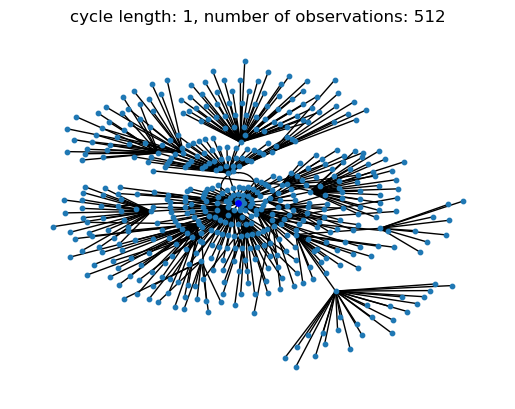

BooleanNetwork: N=11. avg_k= 1.5454545454545454. Run-ins: 2048. Observed cycles: 3. t_records: 2048. u_records: 0
Cycle lengths: [2, 2, 1]
2^N = 2^11 = 2048


In [9]:
# a runtime: 31.5s  # a runtime: 1m 25.8s
import matplotlib.pyplot as plt
from boolean_networks import BooleanNetwork
from bn_graph_methods import *


bn_11 = BooleanNetwork(11, possible_functions_indices_list=list(range(1,15)), initial_sample_size=0)  # excludes tautology and 

bn_11.systematic_sample()

count = 0
for record in (c_records:=bn_11.bn_collapsed_cycles.cycle_records):
    print()
    see_run = TrajectoryCycleGraph()
    see_run.set_cycle(record.cycle_states_list)
    nodes = []
    for t_record in bn_11.bn_trajectories.t_records:
        if t_record.end_index == c_records.index(record):
            # for state in t_record.run_in:
            #     print(state_str(state))
            nodes.extend(see_run.add_all(run_in_as_edges(t_record.run_in), edge_weights(t_record.run_in))) # ... .extend(/executes this statement/)
    plt.figure()
    plt.title(f"cycle length: {len(record)}, number of observations: {record.num_observations}")
    see_run.visualize_nx(reversed=False)
    plt.show()
print(bn_11)   
print(f"2^N = 2^{len(bn_11)} = {2**len(bn_11)}")